In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

In [2]:
song_data = pd.read_csv("../Data/Most_Streamed_Spotify_Songs_2024.csv", encoding = 'unicode_escape')
song_data.head()

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,SiriusXM Spins,Deezer Playlist Count,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,4/26/2024,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,684,62.0,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0
1,Not Like Us,Not Like Us,Kendrick Lamar,5/4/2024,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,3,67.0,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1
2,i like the way you kiss me,I like the way you kiss me,Artemas,3/19/2024,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,536,136.0,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0
3,Flowers,Flowers - Single,Miley Cyrus,1/12/2023,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,"2,182",264.0,"24,684,248",210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0
4,Houdini,Houdini,Eminem,5/31/2024,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,1,82.0,"17,660,624",105.0,"4,493,884","7,006","207,179","457,017",NaN,1


In [3]:
#Split dates in Release Date Column 
#Split Month to Month Column 
#Split Year Column 

#Converting Release Date Column to DateTime Format 
song_data['Release Date']=pd.to_datetime(song_data['Release Date'])
song_data.dtypes

#Extracting Month and Year
song_data['Month']= song_data['Release Date'].dt.month
song_data['Year']= song_data['Release Date'].dt.year
song_data.head(3)


,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Deezer Playlist Reach,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,"17,598,718",114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,"10,422,430",111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,"36,321,847",172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024


In [4]:
#Create bins for seasons and update Df with Season Name 

bins= [0,3,6,9,12]
season_names = ["Winter","Spring","Summer","Fall"]
song_data["Seasons"]= pd.cut(song_data["Month"],bins,labels=season_names, include_lowest=True)
song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1,725.4,"390,470,936","30,716","196,631,588",...,114.0,"18,004,655","22,931","4,818,457","2,669,262",NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2,545.9,"323,703,884","28,113","174,597,137",...,111.0,"7,780,028","28,444","6,623,075","1,118,279",NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3,538.4,"601,309,283","54,331","211,607,669",...,172.0,"5,022,621","5,639","7,208,651","5,285,340",NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4,444.9,"2,031,280,633","269,802","136,569,078",...,210.0,"190,260,277","203,384",NaN,"11,822,942",NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5,423.3,"107,034,922","7,223","151,469,874",...,105.0,"4,493,884","7,006","207,179","457,017",NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,"4,585",19.4,"305,049,963","65,770","5,103,054",...,NaN,"20,104,066","13,184","50,633,006","656,337",NaN,1,9,2017,Summer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,"4,575",19.4,"52,282,360","4,602","1,449,767",...,NaN,NaN,NaN,NaN,"193,590",NaN,0,7,2018,Summer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,"4,571",19.4,"189,972,685","72,066","6,704,802",...,6.0,"84,426,740","28,999",NaN,"1,135,998",NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,"4,591",19.4,"145,467,020","14,037","7,387,064",...,7.0,"6,817,840",NaN,NaN,"448,292",NaN,0,11,2016,Fall


In [5]:
song_data.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                         object
Track Score                          float64
Spotify Streams                       object
Spotify Playlist Count                object
Spotify Playlist Reach                object
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                 object
Amazon Pla

In [6]:
#Convert columns to string, replace commas 
columns_to_convert = ['Spotify Streams', 'All Time Rank', 'Spotify Playlist Count','Spotify Playlist Reach','Deezer Playlist Reach',
                      'Amazon Playlist Count', 'Pandora Track Stations', 'Pandora Streams','Soundcloud Streams','Shazam Counts']
for column in columns_to_convert:
    song_data[column] = song_data[column].astype(str).str.replace(',', '').astype(float)

# Set pandas display options to expand numbers instead of using scientific notation
pd.set_option('display.float_format', '{:.2f}'.format)

song_data

,Track,Album Name,Artist,Release Date,ISRC,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,...,Amazon Playlist Count,Pandora Streams,Pandora Track Stations,Soundcloud Streams,Shazam Counts,TIDAL Popularity,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,QM24S2402528,1.00,725.40,390470936.00,30716.00,196631588.00,...,114.00,18004655.00,22931.00,4818457.00,2669262.00,NaN,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,USUG12400910,2.00,545.90,323703884.00,28113.00,174597137.00,...,111.00,7780028.00,28444.00,6623075.00,1118279.00,NaN,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,QZJ842400387,3.00,538.40,601309283.00,54331.00,211607669.00,...,172.00,5022621.00,5639.00,7208651.00,5285340.00,NaN,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,USSM12209777,4.00,444.90,2031280633.00,269802.00,136569078.00,...,210.00,190260277.00,203384.00,NaN,11822942.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,USUG12403398,5.00,423.30,107034922.00,7223.00,151469874.00,...,105.00,4493884.00,7006.00,207179.00,457017.00,NaN,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,QM8DG1703420,4585.00,19.40,305049963.00,65770.00,5103054.00,...,NaN,20104066.00,13184.00,50633006.00,656337.00,NaN,1,9,2017,Summer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,INT101800122,4575.00,19.40,52282360.00,4602.00,1449767.00,...,NaN,NaN,NaN,NaN,193590.00,NaN,0,7,2018,Summer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,USUG12000043,4571.00,19.40,189972685.00,72066.00,6704802.00,...,6.00,84426740.00,28999.00,NaN,1135998.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,INY091600067,4591.00,19.40,145467020.00,14037.00,7387064.00,...,7.00,6817840.00,NaN,NaN,448292.00,NaN,0,11,2016,Fall


In [7]:
song_data.dtypes

Track                                 object
Album Name                            object
Artist                                object
Release Date                  datetime64[ns]
ISRC                                  object
All Time Rank                        float64
Track Score                          float64
Spotify Streams                      float64
Spotify Playlist Count               float64
Spotify Playlist Reach               float64
Spotify Popularity                   float64
YouTube Views                         object
YouTube Likes                         object
TikTok Posts                          object
TikTok Likes                          object
TikTok Views                          object
YouTube Playlist Reach                object
Apple Music Playlist Count           float64
AirPlay Spins                         object
SiriusXM Spins                        object
Deezer Playlist Count                float64
Deezer Playlist Reach                float64
Amazon Pla

In [8]:
#Reducing DataFrame to the columns needed 

reduced_songdata = song_data[
    ["Track", "Album Name","Artist","Release Date","All Time Rank",
     "Spotify Streams","Spotify Popularity","YouTube Views","YouTube Likes",
     "TikTok Posts","TikTok Likes","TikTok Views","AirPlay Spins","Pandora Streams",
     "Soundcloud Streams", "Explicit Track","Month","Year","Seasons"]]

reduced_songdata

,Track,Album Name,Artist,Release Date,All Time Rank,Spotify Streams,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views,AirPlay Spins,Pandora Streams,Soundcloud Streams,Explicit Track,Month,Year,Seasons
0,MILLION DOLLAR BABY,Million Dollar Baby - Single,Tommy Richman,2024-04-26,1.00,390470936.00,92.00,"84,274,754","1,713,126","5,767,700","651,565,900","5,332,281,936","40,975",18004655.00,4818457.00,0,4,2024,Spring
1,Not Like Us,Not Like Us,Kendrick Lamar,2024-05-04,2.00,323703884.00,92.00,"116,347,040","3,486,739","674,700","35,223,547","208,339,025","40,778",7780028.00,6623075.00,1,5,2024,Spring
2,i like the way you kiss me,I like the way you kiss me,Artemas,2024-03-19,3.00,601309283.00,92.00,"122,599,116","2,228,730","3,025,400","275,154,237","3,369,120,610","74,333",5022621.00,7208651.00,0,3,2024,Winter
3,Flowers,Flowers - Single,Miley Cyrus,2023-01-12,4.00,2031280633.00,85.00,"1,096,100,899","10,629,796","7,189,811","1,078,757,968","14,603,725,994","1,474,799",190260277.00,NaN,0,1,2023,Winter
4,Houdini,Houdini,Eminem,2024-05-31,5.00,107034922.00,88.00,"77,373,957","3,670,188","16,400",NaN,NaN,"12,185",4493884.00,207179.00,1,5,2024,Spring
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,For the Last Time,For the Last Time,$uicideboy$,2017-09-05,4585.00,305049963.00,71.00,"149,247,747","1,397,590","48,370","20,202,000","143,934,379",6,20104066.00,50633006.00,1,9,2017,Summer
4596,Dil Meri Na Sune,"Dil Meri Na Sune (From ""Genius"")",Atif Aslam,2018-07-27,4575.00,52282360.00,56.00,"943,920,245","5,347,766",NaN,"1,721","19,935",412,NaN,NaN,0,7,2018,Summer
4597,Grace (feat. 42 Dugg),My Turn,Lil Baby,2020-02-28,4571.00,189972685.00,65.00,"201,027,333","1,081,402","7,596","5,288,677","36,849,005",204,84426740.00,NaN,1,2,2020,Winter
4598,Nashe Si Chadh Gayi,November Top 10 Songs,Arijit Singh,2016-11-08,4591.00,145467020.00,66.00,"1,118,595,159","3,868,828","11,433","2,534,831","37,757,301","1,200",6817840.00,NaN,0,11,2016,Fall


In [9]:
categorical_columns = reduced_songdata.select_dtypes(['category', 'object']).columns
reduced_songdata[categorical_columns] = reduced_songdata[categorical_columns].astype(str)

/var/folders/0_/j4jdzkjn11g63ptmz1glvf280000gn/T/ipykernel_77276/3255212970.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_songdata[categorical_columns] = reduced_songdata[categorical_columns].astype(str)


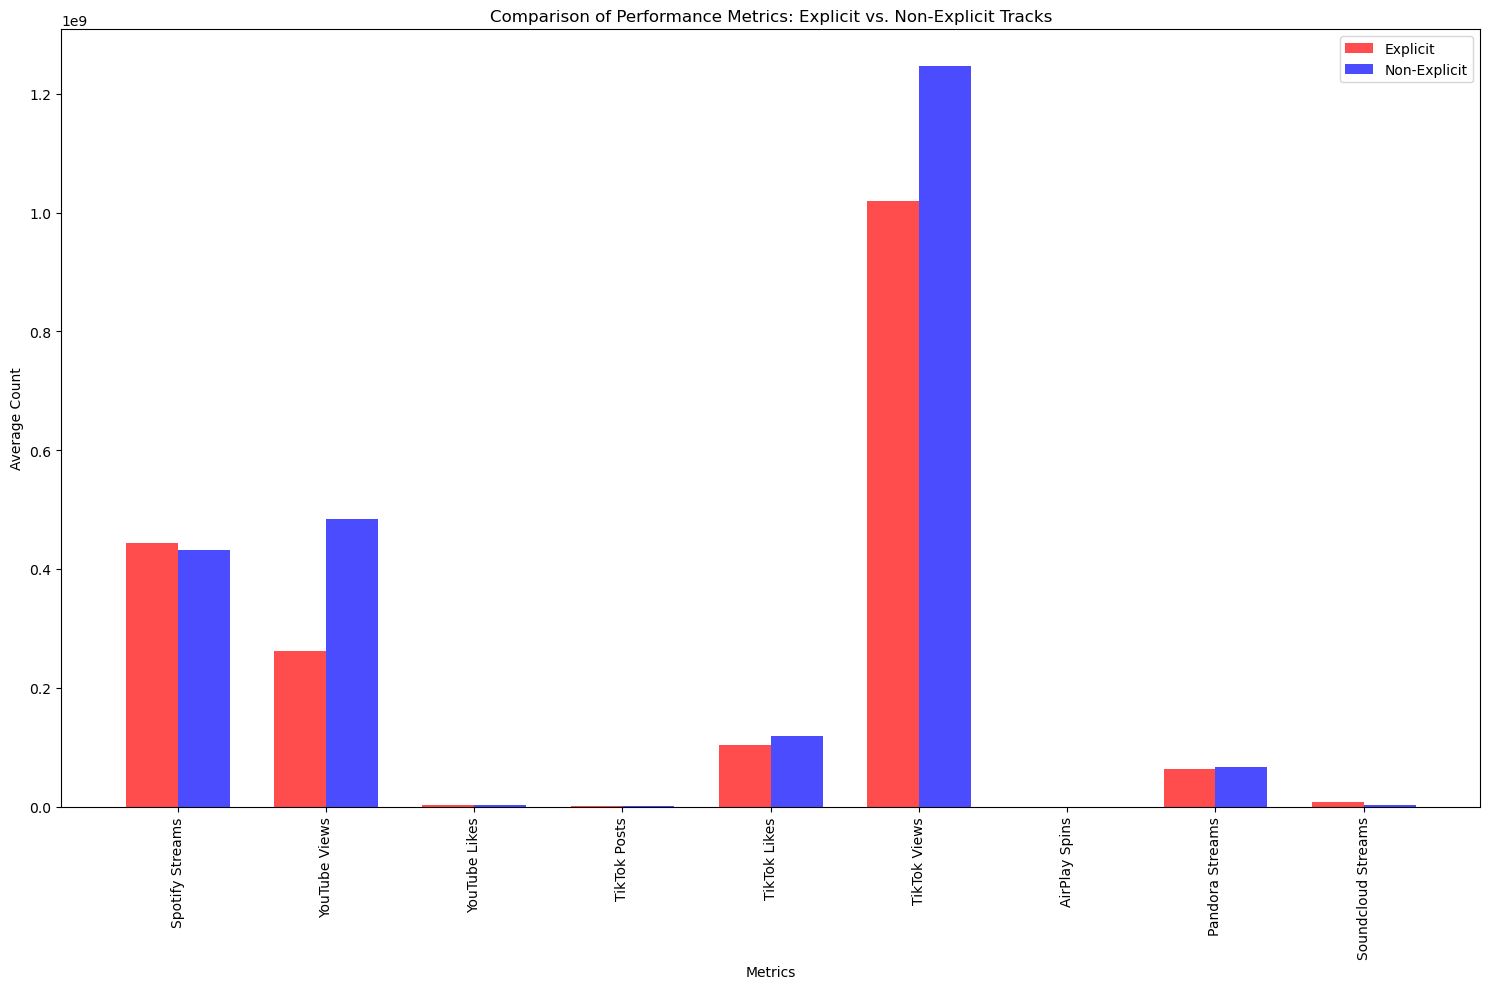

In [10]:
# Replace NaN values with 0 in the entire dataframe
data = reduced_songdata.fillna(0)

# Convert numeric columns to appropriate data types by removing commas and converting to numbers
numeric_columns = [
    'Spotify Streams',
    'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'AirPlay Spins',
    'Pandora Streams',
    'Soundcloud Streams'
]

for column in numeric_columns:
    data[column] = data[column].astype(str).str.replace(',', '').astype(float)

# Step 2: Segment Data into Explicit and Non-Explicit
explicit_tracks = data[data['Explicit Track'].astype(int) == 1]
non_explicit_tracks = data[data['Explicit Track'].astype(int) == 0]

# Step 3: Calculate Metrics
# Calculate average performance metrics for each category
explicit_avg = explicit_tracks[numeric_columns].mean()
non_explicit_avg = non_explicit_tracks[numeric_columns].mean()

# Step 4: Visualization
# Bar chart to compare performance metrics
plt.figure(figsize=(15, 10))
bar_width = 0.35  # Width of the bars
x = range(len(numeric_columns))

# Plot bars for explicit and non-explicit averages
plt.bar(x, explicit_avg, width=bar_width, label='Explicit', color='red', alpha=0.7)
plt.bar([p + bar_width for p in x], non_explicit_avg, width=bar_width, label='Non-Explicit', color='blue', alpha=0.7)

plt.title('Comparison of Performance Metrics: Explicit vs. Non-Explicit Tracks')
plt.ylabel('Average Count')
plt.xlabel('Metrics')
plt.xticks([p + bar_width/2 for p in x], numeric_columns, rotation=90)  # Center the labels
plt.legend()
plt.tight_layout()
plt.show()

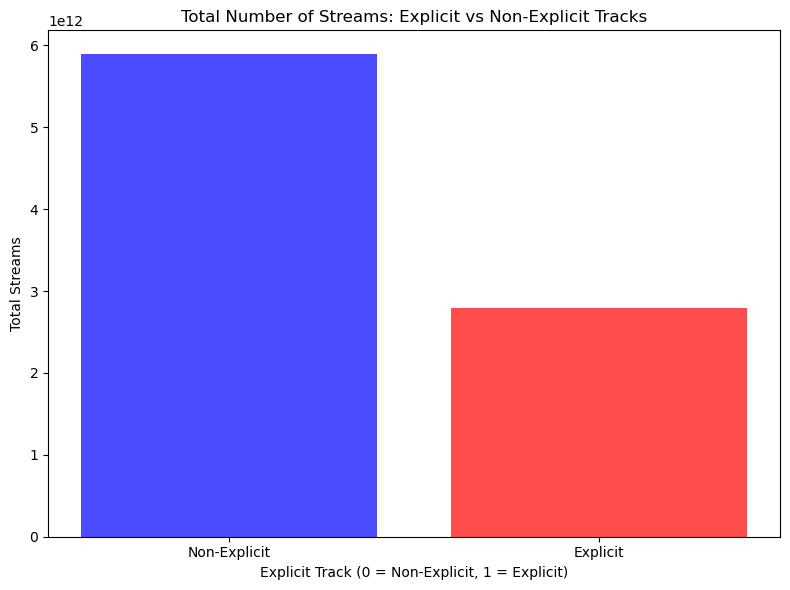

,Explicit Track,Total Streams
0,0,5890637634989.00
1,1,2789722145892.00


In [11]:
# Calculate the total number of streams by summing relevant columns
data['Total Streams'] = data[['Spotify Streams',
    'YouTube Views', 'YouTube Likes',
    'TikTok Posts', 'TikTok Likes', 'TikTok Views',
    'AirPlay Spins',
    'Pandora Streams',
    'Soundcloud Streams']].sum(axis=1)

# Group by 'Explicit Track' and calculate the sum of total streams for each group
grouped_data = data.groupby('Explicit Track')['Total Streams'].sum().reset_index()

# Plot the data
plt.figure(figsize=(8, 6))
plt.bar(grouped_data['Explicit Track'].astype(str), grouped_data['Total Streams'], color=['blue', 'red'], alpha=0.7)
plt.title('Total Number of Streams: Explicit vs Non-Explicit Tracks')
plt.xlabel('Explicit Track (0 = Non-Explicit, 1 = Explicit)')
plt.ylabel('Total Streams')
plt.xticks([0, 1], ['Non-Explicit', 'Explicit'])
plt.tight_layout()
plt.show()

# Display the grouped data for clarity
grouped_data

In [14]:
# Perform an independent t-test
# Using only the numeric columns for comparison
t_stat, p_values = {}, {}

for column in numeric_columns:
    t_stat[column], p_values[column] = ttest_ind(explicit_tracks[column], non_explicit_tracks[column])

# Print the results
print("T-statistics and P-values for each metric:")
for column in numeric_columns:
    print(f"{column}: T-statistic = {t_stat[column]}, P-value = {p_values[column]}")

# Interpret the results
alpha = 0.05
significant_differences = {column: p < alpha for column, p in p_values.items()}

print("Significant differences in performance metrics:")
for column, is_significant in significant_differences.items():
    if is_significant:
        print(f"There is a significant difference in {column} between explicit and non-explicit tracks.")
    else:
        print(f"There is no significant difference in {column} between explicit and non-explicit tracks.")
    

T-statistics and P-values for each metric:
Spotify Streams: T-statistic = 0.6174139228149301, P-value = 0.536992314890172
YouTube Views: T-statistic = nan, P-value = nan
YouTube Likes: T-statistic = nan, P-value = nan
TikTok Posts: T-statistic = nan, P-value = nan
TikTok Likes: T-statistic = nan, P-value = nan
TikTok Views: T-statistic = nan, P-value = nan
AirPlay Spins: T-statistic = nan, P-value = nan
Pandora Streams: T-statistic = -0.7087626851832926, P-value = 0.47850768942081623
Soundcloud Streams: T-statistic = 10.556352030740245, P-value = 9.337393947097927e-26
Significant differences in performance metrics:
There is no significant difference in Spotify Streams between explicit and non-explicit tracks.
There is no significant difference in YouTube Views between explicit and non-explicit tracks.
There is no significant difference in YouTube Likes between explicit and non-explicit tracks.
There is no significant difference in TikTok Posts between explicit and non-explicit tracks.


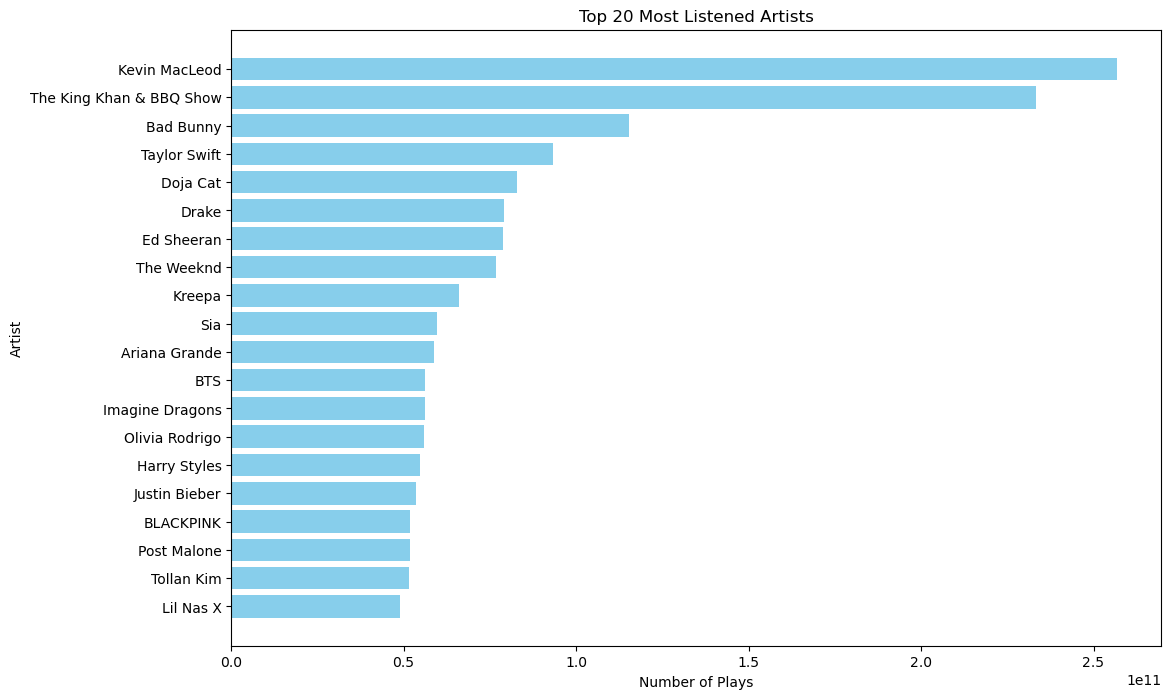

In [21]:
# Grouping by artist and summing up their streams
artist_streams = data.groupby('Artist')['Total Streams'].sum().reset_index()

# Sorting the artists by the total number of streams and selecting the top 20
top_20_artists = artist_streams.sort_values(by='Total Streams', ascending=False).head(20)

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_artists['Artist'], top_20_artists['Total Streams'], color='skyblue')
plt.xlabel('Number of Plays')
plt.ylabel('Artist')
plt.title('Top 20 Most Listened Artists')
plt.gca().invert_yaxis()  # Highest streams at the top
plt.show()


Fun Fact: Kevin MacLeod composed more than 2,000 royalty free musics that are used on social media. This explained is ranking as number 1 of the most streamed artist.
The King Khan & BBQ Show as a very very popular song on Tiktok with more than 18 billions uses!

Than we should look at Spotify only: 

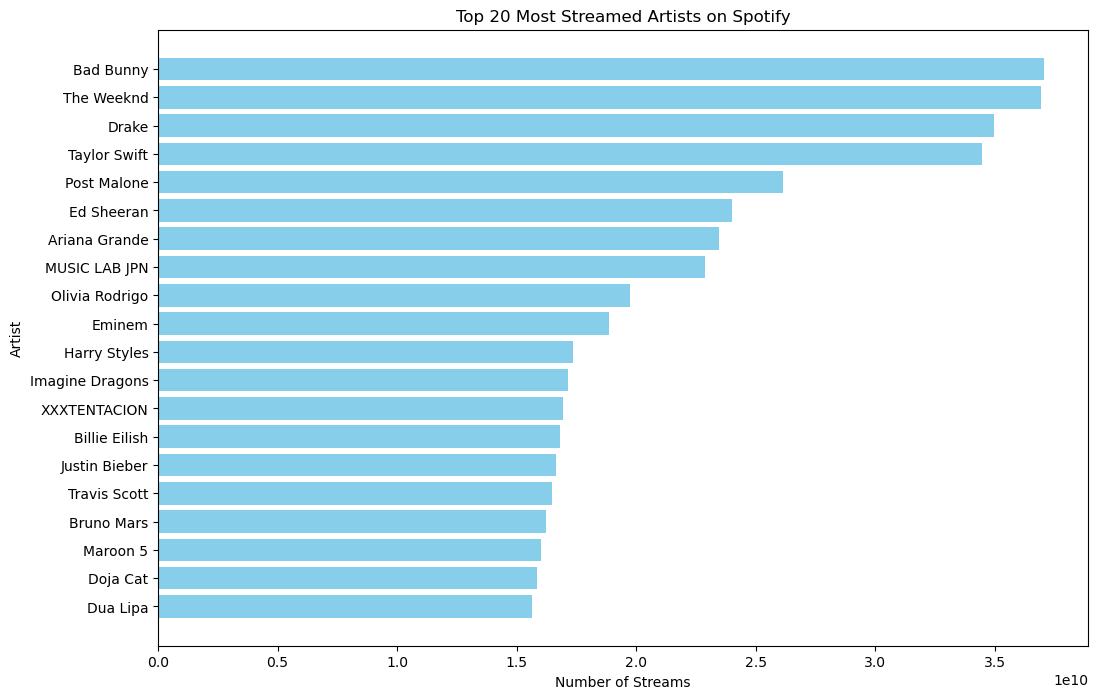

In [22]:
# Grouping by artist and summing up their streams
artist_streams = data.groupby('Artist')['Spotify Streams'].sum().reset_index()

# Sorting the artists by the total number of streams and selecting the top 20
top_20_artists = artist_streams.sort_values(by='Spotify Streams', ascending=False).head(20)

# Creating the bar chart
plt.figure(figsize=(12, 8))
plt.barh(top_20_artists['Artist'], top_20_artists['Spotify Streams'], color='skyblue')
plt.xlabel('Number of Streams')
plt.ylabel('Artist')
plt.title('Top 20 Most Streamed Artists on Spotify')
plt.gca().invert_yaxis()  # Highest streams at the top
plt.show()

Follow up question: Are the same artist popular on Youtube?

In [ ]:
#To save use: plt.savefig("output_data/Fig1.png")